# Problem Set 2: Asset Pricing Models & Portfolio Choice

## Task 1: Analyzing Beta Sorted Portfolios

### a)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, kurtosis, skew
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression

In [2]:
data_beta = pd.read_csv(r'ToF_2021_data_PS-3_beta_pf.csv', delimiter=';', header=0, index_col = 0)
data_beta.index = pd.to_datetime(data_beta.index, format='%Y%m')
#print(data_beta.index)
print(data_beta.head(n = 5))
#data_beta.set_index('date', drop = True, inplace = True)


data_FF = pd.read_csv(r'ToF_2021_data_PS-3_FF.csv', delimiter=';', index_col = 0)
data_FF.index = pd.to_datetime(data_FF.index, format='%Y%m')
#data_FF.set_index('date', drop = True, inplace = True)
print(data_FF.head(n = 5))

             beta1   beta2   beta3   beta4   beta5   beta6   beta7   beta8  \
date                                                                         
1963-07-01  0.0135  0.0077  0.0008 -0.0024 -0.0069 -0.0120 -0.0049 -0.0139   
1963-08-01  0.0352  0.0389  0.0429  0.0525  0.0523  0.0755  0.0757  0.0491   
1963-09-01 -0.0309 -0.0224 -0.0054 -0.0097 -0.0137 -0.0027 -0.0063 -0.0100   
1963-10-01  0.0125 -0.0012  0.0200  0.0512  0.0232  0.0178  0.0663  0.0478   
1963-11-01 -0.0091 -0.0015  0.0160 -0.0205 -0.0094 -0.0069 -0.0132 -0.0051   

             beta9  beta10  
date                        
1963-07-01 -0.0194 -0.0077  
1963-08-01  0.0904  0.1047  
1963-09-01 -0.0192 -0.0368  
1963-10-01  0.0310  0.0301  
1963-11-01 -0.0020  0.0052  
            Mkt_RF     SMB     HML     RMW     CMA      RF
date                                                      
1963-07-01 -0.0039 -0.0045 -0.0094  0.0066 -0.0115  0.0027
1963-08-01  0.0507 -0.0082  0.0182  0.0040 -0.0040  0.0025
1963-09-01 -0.

In [3]:
rf_adj = data_FF['RF'].to_numpy()
statistics = pd.DataFrame(columns = data_beta.columns, index = ['Annual_Mean_Return', 'Annual_Std', 'Annual_Excess_Return', 'Annual_Excess_Std', "Annual_Sharpe_Ratio"])
for column in data_beta.columns:
    returns_adj = data_beta[column].to_numpy()
    mean_return = np.mean(returns_adj) * 12
    statistics.loc['Annual_Mean_Return', column] = mean_return
    std = 12**0.5 * np.std(returns_adj)
    statistics.loc['Annual_Std', column] = std
    excess_return = np.sum(returns_adj - rf_adj)/56
    statistics.loc['Annual_Excess_Return', column] = excess_return
    excess_std = np.std(returns_adj)*(12**0.5)
    # excess_std = np.std(returns_adj - rf_adj)*(12**0.5)
    statistics.loc['Annual_Excess_Std', column] = excess_std
    sharpe_ratio = excess_return / excess_std
    statistics.loc["Annual_Sharpe_Ratio", column] = sharpe_ratio
    
print(statistics)


                         beta1     beta2     beta3     beta4     beta5  \
Annual_Mean_Return    0.112186  0.109293  0.118481  0.130431  0.118619   
Annual_Std            0.119012  0.131352  0.140925  0.158933  0.165454   
Annual_Excess_Return  0.070293  0.067296  0.076812  0.089189  0.076955   
Annual_Excess_Std     0.119012  0.131352  0.140925  0.158933  0.165454   
Annual_Sharpe_Ratio   0.590637  0.512338  0.545061  0.561174  0.465116   

                         beta6     beta7     beta8     beta9    beta10  
Annual_Mean_Return    0.128726  0.114752  0.137202  0.126393  0.133314  
Annual_Std            0.178226  0.189436  0.208976   0.23108  0.273389  
Annual_Excess_Return  0.087423   0.07295  0.096202  0.085007  0.092175  
Annual_Excess_Std     0.178226  0.189436  0.208976   0.23108  0.273389  
Annual_Sharpe_Ratio   0.490519  0.385091  0.460349  0.367868  0.337157  


## b)

In [4]:
CAPM_Stats = pd.DataFrame(columns = data_beta.columns, index =['Alpha', 'Beta', 'P-Value', 'Coefficient Of Determination'])
for column in data_beta.columns:
    LR = sm.OLS(data_beta[column].to_numpy(), sm.add_constant(data_FF['Mkt_RF'].to_numpy()))
    LR_results = LR.fit()
    LR_results.params
    CAPM_Stats.loc['Beta', column] = LR_results.params[1]
    CAPM_Stats.loc['Alpha', column] = LR_results.params[0]
    CAPM_Stats.loc['P-Value', column] = LR_results.pvalues[1]
    CAPM_Stats.loc['Coefficient Of Determination', column] = LR_results.rsquared
    # print(LR_results.summary())
   
statistics = pd.concat([statistics, CAPM_Stats])
print(statistics)


                                 beta1     beta2     beta3     beta4  \
Annual_Mean_Return            0.112186  0.109293  0.118481  0.130431   
Annual_Std                    0.119012  0.131352  0.140925  0.158933   
Annual_Excess_Return          0.070293  0.067296  0.076812  0.089189   
Annual_Excess_Std             0.119012  0.131352  0.140925  0.158933   
Annual_Sharpe_Ratio           0.590637  0.512338  0.545061  0.561174   
Alpha                         0.005832  0.004859   0.00502  0.005233   
Beta                          0.603294  0.728863  0.832628  0.966916   
P-Value                            0.0       0.0       0.0       0.0   
Coefficient Of Determination  0.610967  0.732085  0.829985  0.880012   

                                 beta5     beta6     beta7     beta8  \
Annual_Mean_Return            0.118619  0.128726  0.114752  0.137202   
Annual_Std                    0.165454  0.178226  0.189436  0.208976   
Annual_Excess_Return          0.076955  0.087423   0.07295  0.0

## c) Plot the PF's mean returns (y) against estimated betas and indicate the Mkt PF as well as the security market line

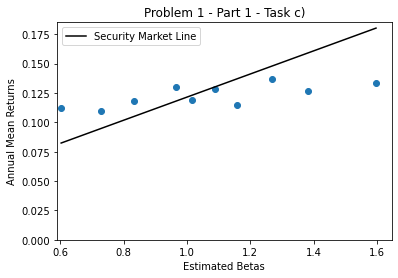

In [5]:
statistics_t = np.transpose(statistics)
X = np.array(statistics_t['Beta'], dtype=float)
Y = np.array(statistics_t['Annual_Mean_Return'], dtype=float)
plt.scatter(X,Y)

b, m = np.polyfit(X, Y, 1)

plt.plot(X, Y, '.')
plt.plot(X, b+m * X, '-', color='Black', label = 'Security Market Line')
plt.xlim(xmin=0.59)
plt.legend()
plt.ylim(ymin=0)

plt.title('Problem 1 - Part 1 - Task c)')
plt.xlabel('Estimated Betas')
plt.ylabel('Annual Mean Returns')
plt.show()

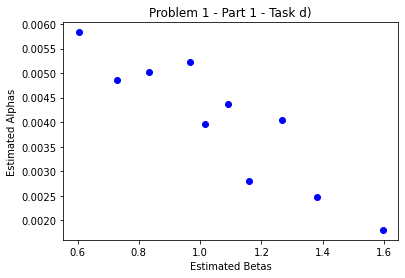

In [6]:
plt.plot(statistics_t['Beta'], statistics_t['Alpha'], 'ro', color='Blue')

plt.xlabel('Estimated Betas')
plt.ylabel('Estimated Alphas')

plt.title('Problem 1 - Part 1 - Task d)')
plt.show()

## e) Plot the Regression R2 (y) against the PF's betas (x)

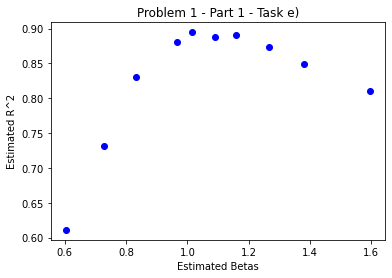

In [7]:
plt.plot(statistics_t['Beta'], statistics_t['Coefficient Of Determination'], 'ro', color='Blue')

plt.xlabel('Estimated Betas')
plt.ylabel('Estimated R^2')

plt.title('Problem 1 - Part 1 - Task e)')
plt.show()


## Problem 1, part II:

### f) market neutral porfolio, weight of long position, log-price plot

In [8]:
#X = np.array(statistics_t['Beta'], dtype=float)
#print(X)
#print(statistics_t['Beta'].iloc[0])
#print(statistics_t['Beta'].iloc[9])
weight_beta1 = statistics_t['Beta'].iloc[9]/statistics_t['Beta'].iloc[0]
weight_beta10 = -1
print(weight_beta1)
# w = [weight_beta1, -1]
# print(w)
#print(data_beta.head)
# beta_weighted_returns = (w * data_beta[['beta1','beta10']])
ret_mkt_neutral_portfolio = weight_beta1 * data_beta['beta1'] + weight_beta10 * data_beta['beta10']
# ret_mkt_neutral_portfolio = beta_weighted_returns['beta1'] + beta_weighted_returns['beta10']
print(ret_mkt_neutral_portfolio.head)




2.6459095299160884
<bound method NDFrame.head of date
1963-07-01    0.043420
1963-08-01   -0.011564
1963-09-01   -0.044959
1963-10-01    0.002974
1963-11-01   -0.029278
                ...   
2021-02-01   -0.168220
2021-03-01    0.228555
2021-04-01    0.003464
2021-05-01    0.082701
2021-06-01   -0.075612
Length: 696, dtype: float64>


In [9]:
ret_mkt_neutral_portfolio = pd.DataFrame(ret_mkt_neutral_portfolio)
ret_mkt_neutral_portfolio

,0
date,
1963-07-01,0.043420
1963-08-01,-0.011564
1963-09-01,-0.044959
1963-10-01,0.002974
1963-11-01,-0.029278
...,...
2021-02-01,-0.168220
2021-03-01,0.228555
2021-04-01,0.003464


In [10]:
ret_mkt_neutral_portfolio['gross_return'] = (ret_mkt_neutral_portfolio + 1)
ret_mkt_neutral_portfolio['gross_return_shifted'] = ret_mkt_neutral_portfolio['gross_return'].shift(fill_value=100)
ret_mkt_neutral_portfolio['price_dev'] = ret_mkt_neutral_portfolio['gross_return_shifted'].cumprod()
ret_mkt_neutral_portfolio['price_dev_log'] = ret_mkt_neutral_portfolio['price_dev'].apply(np.log)
ret_mkt_neutral_portfolio

,0,gross_return,gross_return_shifted,price_dev,price_dev_log
date,,,,,
1963-07-01,0.043420,1.043420,100.000000,100.000000,4.605170
1963-08-01,-0.011564,0.988436,1.043420,104.341978,4.647674
1963-09-01,-0.044959,0.955041,0.988436,103.135369,4.636042
1963-10-01,0.002974,1.002974,0.955041,98.498547,4.590042
1963-11-01,-0.029278,0.970722,1.002974,98.791468,4.593011
...,...,...,...,...,...
2021-02-01,-0.168220,0.831780,0.924875,134060.454583,11.806046
2021-03-01,0.228555,1.228555,0.831780,111508.851356,11.621859
2021-04-01,0.003464,1.003464,1.228555,136994.790696,11.827698


In [11]:
data_FF['market_return'] = data_FF.Mkt_RF + data_FF.RF
data_FF['gross_return'] = (data_FF['market_return'] + 1)
data_FF['gross_return_shifted'] = data_FF['gross_return'].shift(fill_value=100)
data_FF['price_dev'] = data_FF['gross_return_shifted'].cumprod()
data_FF['price_dev_log'] = data_FF['price_dev'].apply(np.log)
data_FF

,Mkt_RF,SMB,HML,RMW,CMA,RF,market_return,gross_return,gross_return_shifted,price_dev,price_dev_log
date,,,,,,,,,,,
1963-07-01,-0.0039,-0.0045,-0.0094,0.0066,-0.0115,0.0027,-0.0012,0.9988,100.0000,100.000000,4.605170
1963-08-01,0.0507,-0.0082,0.0182,0.0040,-0.0040,0.0025,0.0532,1.0532,0.9988,99.880000,4.603969
1963-09-01,-0.0157,-0.0048,0.0017,-0.0076,0.0024,0.0027,-0.0130,0.9870,1.0532,105.193616,4.655803
1963-10-01,0.0253,-0.0130,-0.0004,0.0275,-0.0224,0.0029,0.0282,1.0282,0.9870,103.826099,4.642717
1963-11-01,-0.0085,-0.0085,0.0170,-0.0045,0.0222,0.0027,-0.0058,0.9942,1.0282,106.753995,4.670527
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0.0278,0.0451,0.0708,0.0009,-0.0197,0.0000,0.0278,1.0278,0.9997,32218.797451,10.380305
2021-03-01,0.0308,-0.0097,0.0740,0.0643,0.0344,0.0000,0.0308,1.0308,1.0278,33114.480020,10.407726
2021-04-01,0.0493,-0.0306,-0.0074,0.0226,-0.0271,0.0000,0.0493,1.0493,1.0308,34134.406005,10.438061


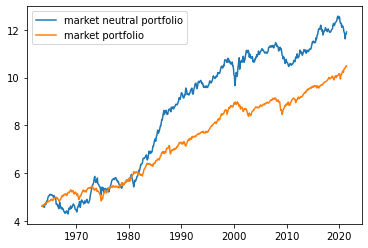

In [12]:
plt.plot(ret_mkt_neutral_portfolio['price_dev_log'], label='market neutral portfolio')
plt.plot(data_FF['price_dev_log'], label="market portfolio")
plt.legend()
plt.show()

### g) Mean returns, sharpe ratios, and correlation

In [13]:
# mean returns
print(f"market neutral portfolio mean return: {ret_mkt_neutral_portfolio.iloc[:,0].mean()}")
print(f"market portfolio mean return: {data_FF.loc[:,'market_return'].mean()}")

market neutral portfolio mean return: 0.013626730070772987
market portfolio mean return: 0.009521982758620677


In [14]:
# sharpe ratios
ret_mkt_neutral_portfolio['excess_return'] = ret_mkt_neutral_portfolio.iloc[:,0] - data_FF['RF']
mkt_neutral_sharpe = ret_mkt_neutral_portfolio['excess_return'].mean() / ret_mkt_neutral_portfolio['excess_return'].std()
mkt_sharpe = data_FF['Mkt_RF'].mean() / data_FF['Mkt_RF'].std()
print(f"market neutral portfolio sharpe ratio: {mkt_neutral_sharpe}")
print(f"market portfolio sharpe ratio: {mkt_sharpe}")

market neutral portfolio sharpe ratio: 0.12514454342796794
market portfolio sharpe ratio: 0.1308557340003551


In [15]:
# correlation of returns
correlation_df = pd.DataFrame([ret_mkt_neutral_portfolio['price_dev'],data_FF['price_dev']]).T
correlation_df.corr()
#since the correlation of the returns is very high it seems that the market neutral portfolio is not market neutral.

,price_dev,price_dev
price_dev,1.000000,0.929597
price_dev,0.929597,1.000000


### h) CAPM regression, FF 3-factor, FF 5-factor regression

In [16]:
ols = LinearRegression()
y = ret_mkt_neutral_portfolio['excess_return'].to_numpy().reshape(-1,1)
x = data_FF['Mkt_RF'].to_numpy().reshape(-1,1)
ols.fit(x, y)
print(f"intercept: {ols.intercept_[0]}") # intercept
print(f"coefficient: {ols.coef_[0][0]}") # list of feature coefficients

intercept: 0.009900160876958585
coefficient: 0.005741368753192865


In [17]:
# sm.OLS(y, X) y:=to be predicted, X:=matrix of features 
LR = sm.OLS(
    ret_mkt_neutral_portfolio['excess_return'].to_numpy(), 
    sm.add_constant(data_FF['Mkt_RF'].to_numpy())
)
LR_results = LR.fit()
print(LR_results.summary())
#R^2 of 0, not sure what is wrong here 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.007204
Date:                Sun, 28 Nov 2021   Prob (F-statistic):              0.932
Time:                        22:44:17   Log-Likelihood:                 776.27
No. Observations:                 696   AIC:                            -1549.
Df Residuals:                     694   BIC:                            -1539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.003      3.260      0.0

In [18]:
from sklearn.metrics import r2_score
preds = ols.predict(x)
r2_score(y, preds)
# correct? rsquare of 0 (with a different method)

1.0380628899797628e-05

In [19]:
ols = LinearRegression()
y = ret_mkt_neutral_portfolio['excess_return'].to_numpy().reshape(-1,1)
x = data_FF[['Mkt_RF', 'SMB', 'HML']].to_numpy()
ols.fit(x, y)
print(f"intercept: {ols.intercept_[0]}") # intercept
print(f"coefficient: {ols.coef_[0]}") # list of feature coefficients

intercept: 0.00893844426025026
coefficient: [ 0.38858361 -1.40949145  0.77742014]


In [20]:
preds = ols.predict(x)
r2_score(y, preds)
# correct?

0.3318156165690205

In [21]:
# sm.OLS(y, X) y:=to be predicted, X:=matrix of features 
LR = sm.OLS(
    ret_mkt_neutral_portfolio['excess_return'].to_numpy(), 
    sm.add_constant(data_FF[['Mkt_RF', 'SMB', 'HML']].to_numpy())
)
LR_results = LR.fit()
print(LR_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           3.15e-60
Time:                        22:44:17   Log-Likelihood:                 916.58
No. Observations:                 696   AIC:                            -1825.
Df Residuals:                     692   BIC:                            -1807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.003      3.566      0.0

In [22]:
ols = LinearRegression()
y = ret_mkt_neutral_portfolio['excess_return'].to_numpy().reshape(-1,1)
x = data_FF[['Mkt_RF', 'SMB', 'HML', 'RMW', 'CMA']].to_numpy()
ols.fit(x, y)
print(f"intercept: {ols.intercept_[0]}") # intercept
print(f"coefficient: {ols.coef_[0]}") # list of feature coefficients

intercept: 0.004496587120136626
coefficient: [ 0.53144374 -1.24193942  0.30603601  0.70576425  1.02643854]


In [23]:
preds = ols.predict(x)
r2_score(y, preds)
# correct?

0.38436051288315964

In [24]:
data_FF[['Mkt_RF', 'SMB', 'HML', 'RMW', 'CMA']].corr()

,Mkt_RF,SMB,HML,RMW,CMA
Mkt_RF,1.000000,0.286976,-0.211974,-0.199848,-0.372966
SMB,0.286976,1.000000,-0.023198,-0.343506,-0.094582
HML,-0.211974,-0.023198,1.000000,0.088024,0.673463
RMW,-0.199848,-0.343506,0.088024,1.000000,-0.021509
CMA,-0.372966,-0.094582,0.673463,-0.021509,1.000000


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = data_FF.columns[:5]
vif_data["VIF"] = [variance_inflation_factor(data_FF.values, i) for i in range(len(data_FF.columns[:5]))]
#not sure why it's an error here, but probably because the R^2 was 0 for one of the estimates above. 

MissingDataError: exog contains inf or nans

In [26]:
# Typically in practice there is a small amount of collinearity among the predictors. 
# As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity"
vif_data

,feature,VIF
0,Mkt_RF,inf
1,SMB,1.220504
2,HML,1.909588
3,RMW,1.203982
4,CMA,2.124753


### i) Trading strategy discussion

In [27]:
data_FF['mkt_rt_var'] = data_FF['market_return'].rolling(window=1*12).var().shift(1)
data_FF['beta1'] = data_beta['beta1']
data_FF['beta10'] = data_beta['beta10']
data_FF['mkt_b1_cov'] = data_FF[['market_return', 'beta1']].rolling(window=5*12).cov().unstack()['market_return']['beta1'].shift(1)
data_FF['mkt_b10_cov'] = data_FF[['market_return', 'beta10']].rolling(window=5*12).cov().unstack()['market_return']['beta10'].shift(1)
data_FF['beta_b1'] = data_FF['mkt_b1_cov'] / data_FF['mkt_rt_var']
data_FF['beta_b10'] = data_FF['mkt_b10_cov'] / data_FF['mkt_rt_var']
data_FF['weight_b1'] = data_FF['beta_b10'] / data_FF['beta_b1']
data_FF

,Mkt_RF,SMB,HML,RMW,CMA,RF,market_return,gross_return,gross_return_shifted,price_dev,price_dev_log,mkt_rt_var,beta1,beta10,mkt_b1_cov,mkt_b10_cov,beta_b1,beta_b10,weight_b1
date,,,,,,,,,,,,,,,,,,,
1963-07-01,-0.0039,-0.0045,-0.0094,0.0066,-0.0115,0.0027,-0.0012,0.9988,100.0000,100.000000,4.605170,NaN,0.0135,-0.0077,NaN,NaN,NaN,NaN,NaN
1963-08-01,0.0507,-0.0082,0.0182,0.0040,-0.0040,0.0025,0.0532,1.0532,0.9988,99.880000,4.603969,NaN,0.0352,0.1047,NaN,NaN,NaN,NaN,NaN
1963-09-01,-0.0157,-0.0048,0.0017,-0.0076,0.0024,0.0027,-0.0130,0.9870,1.0532,105.193616,4.655803,NaN,-0.0309,-0.0368,NaN,NaN,NaN,NaN,NaN
1963-10-01,0.0253,-0.0130,-0.0004,0.0275,-0.0224,0.0029,0.0282,1.0282,0.9870,103.826099,4.642717,NaN,0.0125,0.0301,NaN,NaN,NaN,NaN,NaN
1963-11-01,-0.0085,-0.0085,0.0170,-0.0045,0.0222,0.0027,-0.0058,0.9942,1.0282,106.753995,4.670527,NaN,-0.0091,0.0052,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,0.0278,0.0451,0.0708,0.0009,-0.0197,0.0000,0.0278,1.0278,0.9997,32218.797451,10.380305,0.006337,-0.0392,0.0645,0.001165,0.003229,0.183767,0.509532,2.772712
2021-03-01,0.0308,-0.0097,0.0740,0.0643,0.0344,0.0000,0.0308,1.0308,1.0278,33114.480020,10.407726,0.005323,0.0696,-0.0444,0.001150,0.003226,0.216064,0.605917,2.804337
2021-04-01,0.0493,-0.0306,-0.0074,0.0226,-0.0271,0.0000,0.0493,1.0493,1.0308,34134.406005,10.438061,0.002717,0.0162,0.0394,0.001123,0.003131,0.413488,1.152341,2.786882


In [28]:
weight_beta10 = -1
data_FF['ret_portfolio'] = data_FF['weight_b1'] * data_beta['beta1'] + weight_beta10 * data_beta['beta10']
data_FF['excess_ret_portfolio'] = data_FF['ret_portfolio'] - data_FF['RF']

In [29]:
ols = LinearRegression()
y = data_FF['excess_ret_portfolio'].iloc[5*12:].to_numpy().reshape(-1,1)
x = data_FF[['Mkt_RF', 'SMB', 'HML', 'RMW', 'CMA']].iloc[5*12:].to_numpy()
ols.fit(x, y)
print(f"intercept: {ols.intercept_[0]}") # intercept
print(f"coefficient: {ols.coef_[0]}") # list of feature coefficients

intercept: 0.006061607339072178
coefficient: [ 0.47605328 -1.26195481  0.26296855  0.63187254  1.11758013]


In [30]:
preds = ols.predict(x)
r2_score(y, preds)

0.3410750974262686

In [31]:
trading_returns = pd.DataFrame()
trading_returns['excess_return_mkt_nt1'] = ret_mkt_neutral_portfolio['excess_return']
trading_returns['excess_return_mkt_rebalanced'] = data_FF['excess_ret_portfolio']
trading_returns = trading_returns.iloc[5*12:]

# calculating price dev series
trading_returns['gross_ret_nt1'] = (trading_returns['excess_return_mkt_nt1'] + 1).shift(fill_value=100)
trading_returns['price_dev_nt1'] = trading_returns['gross_ret_nt1'].cumprod()
trading_returns['price_dev_log_nt1'] = trading_returns['price_dev_nt1'].apply(np.log)

trading_returns['gross_ret_rebalanced'] = (trading_returns['excess_return_mkt_rebalanced'] + 1).shift(fill_value=100)
trading_returns['price_dev_rebalanced'] = trading_returns['gross_ret_rebalanced'].cumprod()
trading_returns['price_dev_log_rebalanced'] = trading_returns['price_dev_rebalanced'].apply(np.log)  


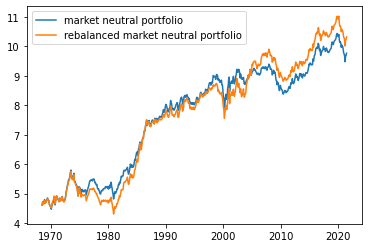

In [32]:
plt.plot(trading_returns['price_dev_log_nt1'], label='market neutral portfolio')
plt.plot(trading_returns['price_dev_log_rebalanced'], label="rebalanced market neutral portfolio")
plt.legend()
plt.show()